**Using the feature file generated using mobilene_s4, efficientvit_m3, fastvit_t8**

0. 'dyed-lifted-polyps'
1. 'dyed-resection-margins'
2. 'esophagitis'
3. 'normal-cecum'
4. 'normal-pylorus'
5. 'normal-z-line'
6. 'polyps'
7. 'ulcerative-colitis'

In [61]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

In [62]:
import pickle

feature_file_mobileOne = 'rifat_mobileOne_s4_2048.pkl'
feature_file_EfficientVit = 'efficientvit_m3_320.pkl'
feature_file_FastVit = 'fastVit_T8_features.pkl'

# Load feature files using pickle
with open(feature_file_mobileOne, 'rb') as file:
    features_mobileOne = pickle.load(file)

with open(feature_file_EfficientVit, 'rb') as file:
    features_EfficientVit = pickle.load(file)

with open(feature_file_FastVit, 'rb') as file:
    features_FastVit = pickle.load(file)

### MobileOne_s4

In [63]:
features_mobileOne.keys()

dict_keys(['features', 'labels'])

In [64]:
# Access the features and labels
features_m = features_mobileOne['features']
labels_m = features_mobileOne['labels']

print(features_m.shape)
print(labels_m.shape)

(8000, 2048)
(8000,)


In [65]:
print(isinstance(features_m, np.ndarray))
print(isinstance(labels_m, np.ndarray))
print(features_m.dtype)
print(labels_m.dtype)

True
True
float32
int64


In [66]:
set(features_mobileOne['labels'])

{0, 1, 2, 3, 4, 5, 6, 7}

### FastVit_t8

In [67]:
features_FastVit.keys()

dict_keys(['features', 'labels'])

In [68]:
set(features_FastVit['labels'])

{'dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis'}

In [69]:
# Define the mapping dictionary
class_mapping = {
    'dyed-lifted-polyps': 0,
    'dyed-resection-margins': 1,
    'esophagitis': 2,
    'normal-cecum': 3,
    'normal-pylorus': 4,
    'normal-z-line': 5,
    'polyps': 6,
    'ulcerative-colitis': 7
}

original_labels = features_FastVit['labels']

# Create an array of encoded labels using the mapping dictionary
encoded_labels = [class_mapping[label] for label in original_labels]

# Replace the 'labels' array in the features_FastVit dictionary with the encoded labels
features_FastVit['labels'] = encoded_labels

set(features_FastVit['labels'])

{0, 1, 2, 3, 4, 5, 6, 7}

In [70]:
# Access the features and labels
features_f = features_FastVit['features']
labels_f = features_FastVit['labels']

print(features_f.shape)

torch.Size([8000, 768])


In [71]:
# Converting PyTorch tensor to NumPy array
features_f = features_f.numpy()

# Converting list to a NumPy array
labels_f = np.array(labels_f)

In [72]:
print(features_f.shape)
print(labels_f.shape)

(8000, 768)
(8000,)


### EfficientVit_m3

In [73]:
features_EfficientVit.keys()

dict_keys(['features', 'label'])

In [74]:
set(features_EfficientVit['label'])

{'dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis'}

In [75]:
#encoding labels

original_labels = features_EfficientVit['label']

# Create an array of encoded labels using the mapping dictionary
encoded_labels = [class_mapping[label] for label in original_labels]

features_EfficientVit['label'] = encoded_labels

set(features_EfficientVit['label'])

{0, 1, 2, 3, 4, 5, 6, 7}

In [76]:
# Access the features and labels
features_e = features_EfficientVit['features']
labels_e = features_EfficientVit['label']

print(features_e.shape)

(8000, 320)


## Concatenate features (mobileOne, EfficientVit, and FastVit)

In [77]:
features_m

array([[2.1521943e-19, 2.0826881e-19, 3.6376992e-32, ..., 2.2343564e-13,
        3.6886652e-14, 8.8739270e-01],
       [8.2272481e-13, 1.7538516e-15, 1.2293535e-24, ..., 6.2037625e-10,
        1.3519733e-09, 4.4919151e-01],
       [8.9294847e-09, 8.5422988e-12, 9.7573484e-17, ..., 4.5433574e-11,
        5.9300452e-04, 6.6917919e-02],
       ...,
       [1.5584286e-05, 5.2405706e-08, 7.9025226e-15, ..., 1.6037835e-02,
        7.8535258e-08, 0.0000000e+00],
       [1.2357309e-07, 1.9290786e-08, 9.9849799e-17, ..., 0.0000000e+00,
        3.3504759e-09, 0.0000000e+00],
       [5.2005547e-08, 3.6797565e-10, 2.4038936e-18, ..., 3.1629559e-02,
        5.0401624e-11, 4.2650225e-03]], dtype=float32)

In [78]:
features_e

array([[ -2.528192 ,  -6.6075516,  -9.971182 , ...,   6.705895 ,
          3.8751888,  -2.4646382],
       [ -5.080381 ,  -2.6860964, -10.54216  , ...,   6.763563 ,
          3.956251 ,  -2.542947 ],
       [ -1.8954285,  -6.3981543,  -9.37853  , ...,   5.9959726,
          3.7086258,  -2.8704364],
       ...,
       [ -4.1065464,  -7.055489 ,  -8.533231 , ...,   4.3437724,
          4.7067437,  -1.7042898],
       [ -1.5356984,  -4.140796 ,  -8.543649 , ...,   6.1072574,
          5.3576   ,  -0.8399735],
       [ -3.5287812,  -4.246364 ,  -9.02885  , ...,   4.444788 ,
          4.280409 ,  -2.9469535]], dtype=float32)

In [79]:
features_f

array([[0.48487267, 0.9994433 , 0.5608027 , ..., 0.86250246, 0.7382494 ,
        0.29604843],
       [0.49169254, 1.0091363 , 0.6324309 , ..., 0.7170739 , 0.6781236 ,
        0.2872721 ],
       [0.57157767, 1.174449  , 0.7333189 , ..., 0.7182143 , 0.7965362 ,
        0.38095605],
       ...,
       [0.40927833, 0.9147861 , 0.66414523, ..., 0.66744024, 0.6319086 ,
        0.3444744 ],
       [0.5160056 , 1.1095681 , 0.61290455, ..., 0.9738223 , 0.7162844 ,
        0.46816552],
       [0.5134317 , 1.0735734 , 0.6909492 , ..., 0.9331362 , 0.6127156 ,
        0.40849778]], dtype=float32)

In [80]:
np.array_equal(labels_f, labels_m, labels_e)

True

In [81]:
concatenated_features = np.hstack((features_m, features_f, features_e))
labels=labels_m

In [82]:
concatenated_features

array([[ 2.1521943e-19,  2.0826881e-19,  3.6376992e-32, ...,
         6.7058949e+00,  3.8751888e+00, -2.4646382e+00],
       [ 8.2272481e-13,  1.7538516e-15,  1.2293535e-24, ...,
         6.7635632e+00,  3.9562509e+00, -2.5429471e+00],
       [ 8.9294847e-09,  8.5422988e-12,  9.7573484e-17, ...,
         5.9959726e+00,  3.7086258e+00, -2.8704364e+00],
       ...,
       [ 1.5584286e-05,  5.2405706e-08,  7.9025226e-15, ...,
         4.3437724e+00,  4.7067437e+00, -1.7042898e+00],
       [ 1.2357309e-07,  1.9290786e-08,  9.9849799e-17, ...,
         6.1072574e+00,  5.3576002e+00, -8.3997351e-01],
       [ 5.2005547e-08,  3.6797565e-10,  2.4038936e-18, ...,
         4.4447880e+00,  4.2804089e+00, -2.9469535e+00]], dtype=float32)

In [83]:
print(concatenated_features.shape)
print(labels.shape)

(8000, 3136)
(8000,)


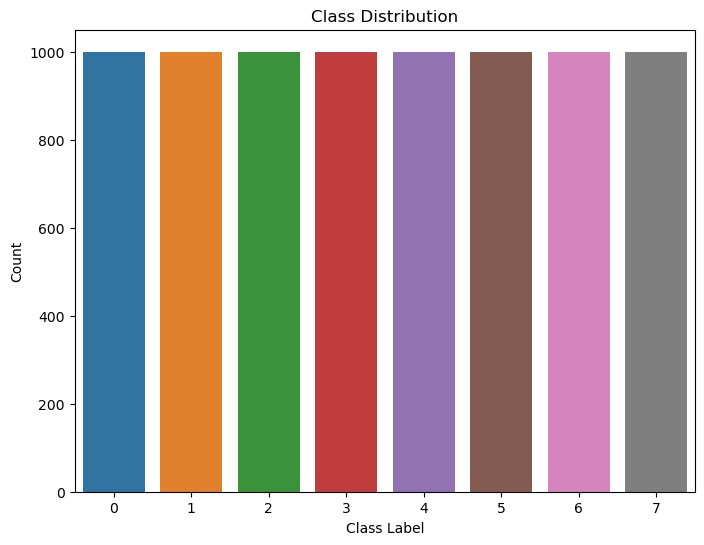

In [84]:
# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=labels)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

0. 'dyed-lifted-polyps'
1. 'dyed-resection-margins'
2. 'esophagitis'
3. 'normal-cecum'
4. 'normal-pylorus'
5. 'normal-z-line'
6. 'polyps'
7. 'ulcerative-colitis'





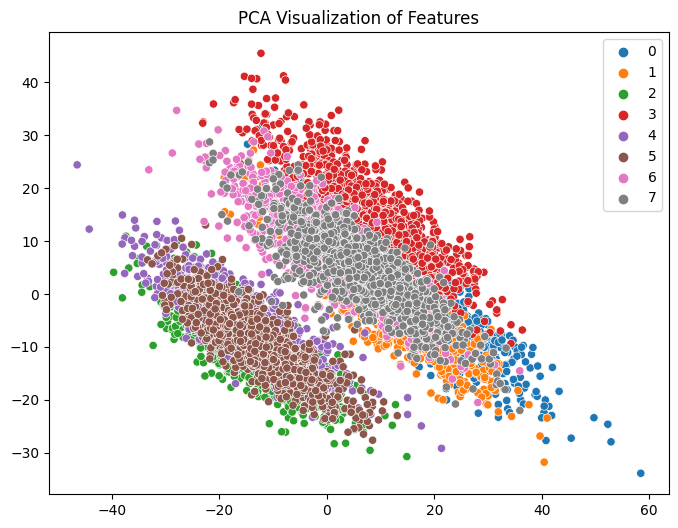

In [33]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(concatenated_features)

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='tab10')
plt.title("PCA Visualization of Features")
plt.show()


Silhouette Score for K-means with PCA: 0.3602779


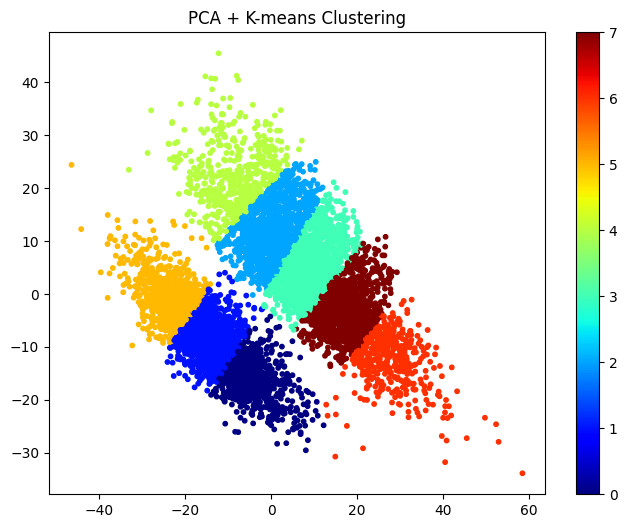

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Apply PCA and then K-means with hyperparameter tuning
param_grid_kmeans = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(concatenated_features)

kmeans_pca = KMeans(random_state=42, n_clusters=8)
grid_search_kmeans_pca = GridSearchCV(kmeans_pca, param_grid_kmeans, cv=3)
grid_search_kmeans_pca.fit(x_pca)

best_kmeans_pca = grid_search_kmeans_pca.best_estimator_
labels_kmeans_pca = best_kmeans_pca.predict(x_pca)

# Compute Silhouette Score for K-means with PCA
silhouette_avg_pca = silhouette_score(x_pca, labels_kmeans_pca)
print("Silhouette Score for K-means with PCA:", silhouette_avg_pca)

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_kmeans_pca, cmap='jet', s=10)
plt.colorbar()
plt.title('PCA + K-means Clustering')
plt.show()

Best hyperparameters for K-means with Truncated SVD: {'max_iter': 100, 'n_init': 15}


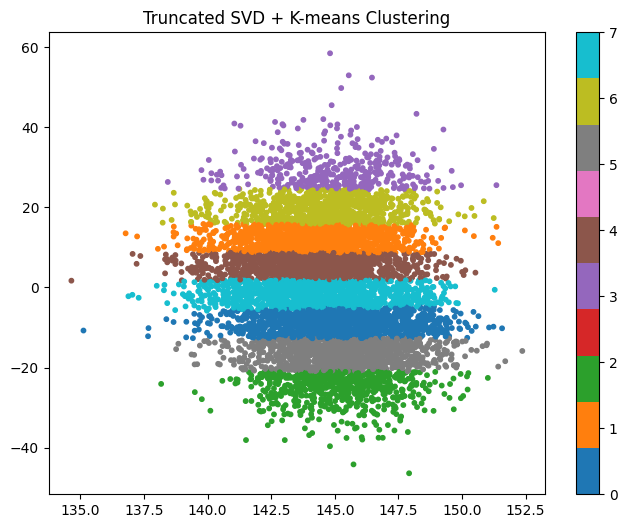

Silhouette Score for Truncated SVD + K-means: 0.39055404


In [35]:
from sklearn.decomposition import TruncatedSVD

# Applying Truncated SVD
tsvd = TruncatedSVD(n_components=2, random_state=42)
x_tsvd = tsvd.fit_transform(concatenated_features)


# Apply K-means with hyperparameter tuning for Truncated SVD
param_grid_kmeans_tsvd = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

kmeans_tsvd = KMeans(random_state=42, n_clusters=8)
grid_search_kmeans_tsvd = GridSearchCV(kmeans_tsvd, param_grid_kmeans_tsvd, cv=3)
grid_search_kmeans_tsvd.fit(x_tsvd)

# Best hyperparameters for K-means with Truncated SVD
best_kmeans_tsvd = grid_search_kmeans_tsvd.best_estimator_
print("Best hyperparameters for K-means with Truncated SVD:", grid_search_kmeans_tsvd.best_params_)

# Applying K-means with the best Truncated SVD
labels_kmeans_tsvd = best_kmeans_tsvd.predict(x_tsvd)

# Plot Truncated SVD + K-means result
plt.figure(figsize=(8, 6))
plt.scatter(x_tsvd[:, 0], x_tsvd[:, 1], c=labels_kmeans_tsvd, cmap='tab10', s=10)
plt.colorbar()
plt.title('Truncated SVD + K-means Clustering')
plt.show()

# Calculate the silhouette score for Truncated SVD + K-means
silhouette_avg_tsvd = silhouette_score(x_tsvd, labels_kmeans_tsvd)
print("Silhouette Score for Truncated SVD + K-means:", silhouette_avg_tsvd)


### K means Clustering and elbow method

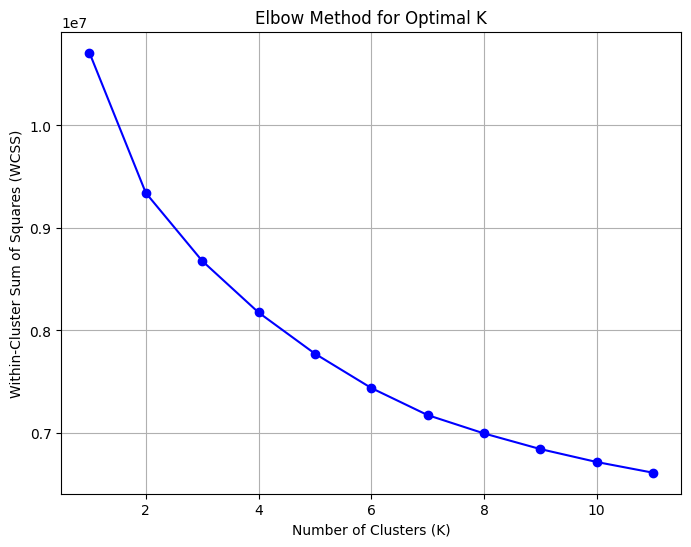

In [36]:
from sklearn.cluster import KMeans

# empty list to store the within-cluster sum of squares for different K values
wcss = []

k_values = range(1, 12)

# Calculate WCSS for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(concatenated_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


## Classification

In [85]:
X = concatenated_features
y = labels
num_classes = len(np.unique(labels))

# Split the data into train(85%), and test(15%) sets with class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Get the count of samples for each class in each set
train_class_counts = [sum(y_train == i) for i in range(num_classes)]
test_class_counts = [sum(y_test == i) for i in range(num_classes)]

# Print the counts for each class in each set
for class_label, train_count, test_count in zip(range(num_classes), train_class_counts, test_class_counts):
    print(f"Class {class_label}: Train {train_count}, Test {test_count}")

Class 0: Train 850, Test 150
Class 1: Train 850, Test 150
Class 2: Train 850, Test 150
Class 3: Train 850, Test 150
Class 4: Train 850, Test 150
Class 5: Train 850, Test 150
Class 6: Train 850, Test 150
Class 7: Train 850, Test 150


In [86]:
print(X_train.shape)
print(X_test.shape)

(6800, 3136)
(1200, 3136)


In [87]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    class_labels = np.unique(y_test)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, f1, cm


### Random Forest

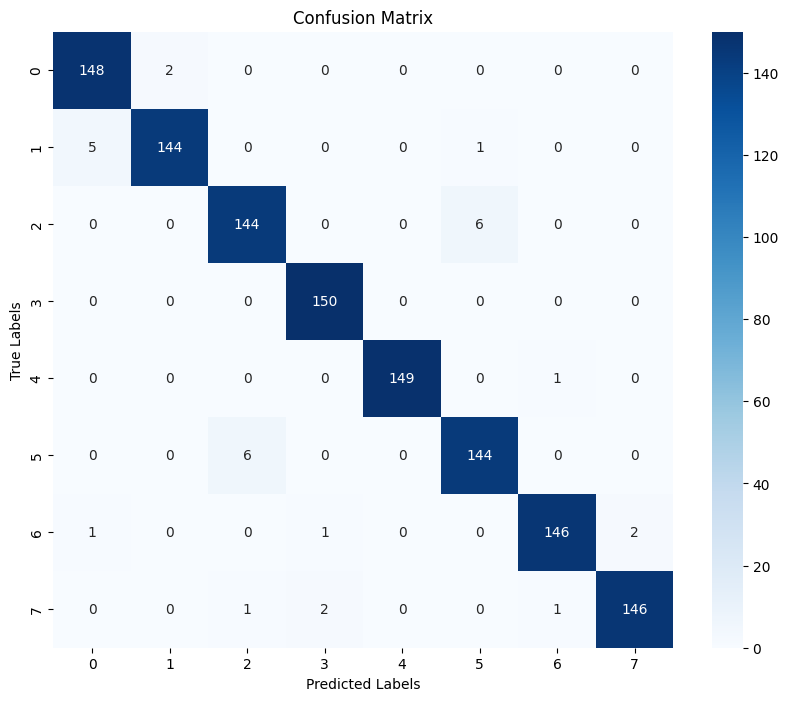

Accuracy: 0.9758333333333333
F1 Score: 0.9758455647346951


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train and evaluate the model
rf_accuracy, rf_f1, rf_cm = train_and_evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)
print(f'Accuracy: {rf_accuracy}')
print(f'F1 Score: {rf_f1}')

## LightGBM

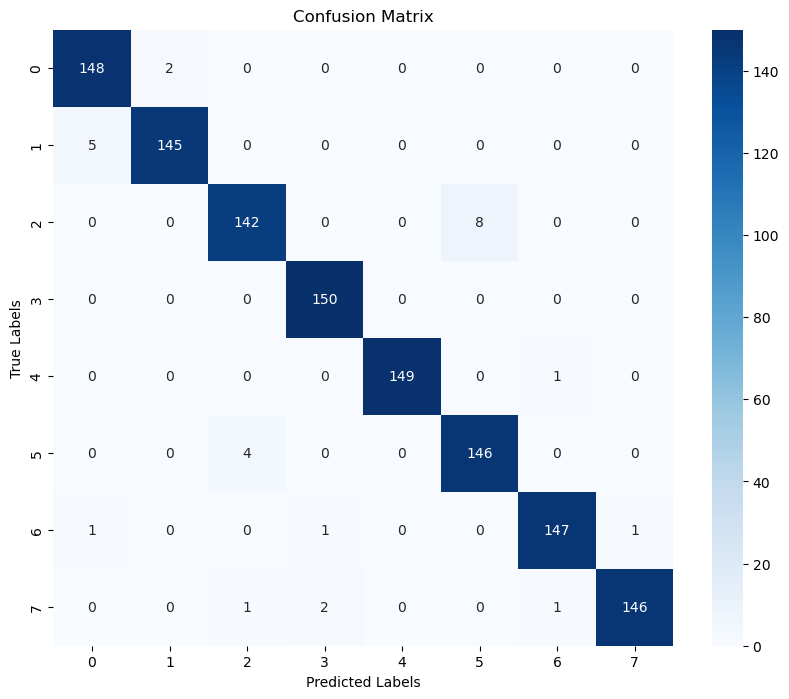

Accuracy: 0.9775
F1 Score: 0.9775084453011985


In [88]:
lgbm_classifier = LGBMClassifier(random_state=42)

# Train and evaluate the model
lgbm_accuracy, lgbm_f1, lgbm_cm = train_and_evaluate_model(lgbm_classifier, X_train, y_train, X_test, y_test)
print(f'Accuracy: {lgbm_accuracy}')
print(f'F1 Score: {lgbm_f1}')

### SVM

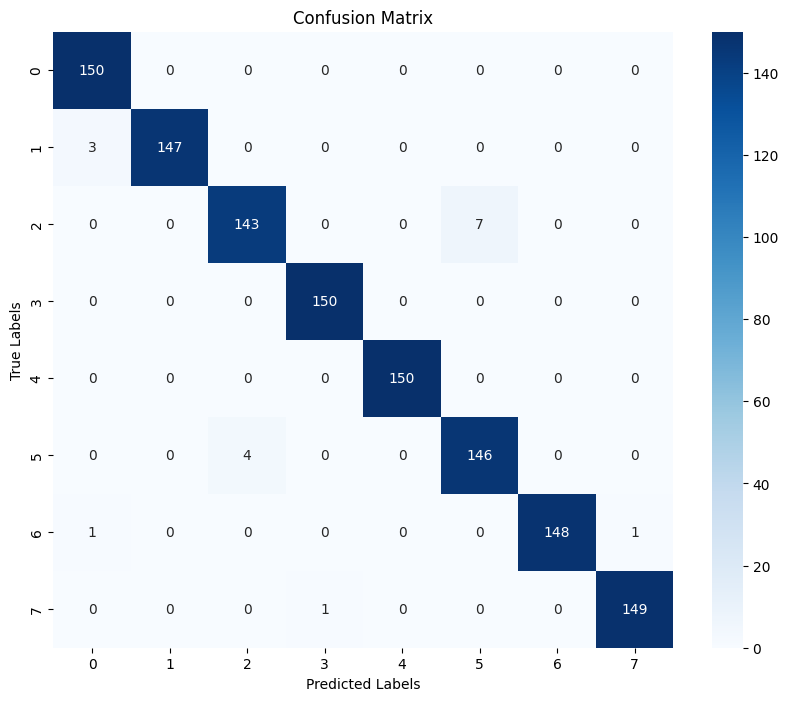

Accuracy: 0.9858333333333333
F1 Score: 0.9858375115704028


In [42]:
svm_classifier = SVC(random_state=42)

# Train and evaluate the model
svm_accuracy, svm_f1, svm_cm = train_and_evaluate_model(svm_classifier, X_train, y_train, X_test, y_test)
print(f'Accuracy: {svm_accuracy}')
print(f'F1 Score: {svm_f1}')

### AdaBoost

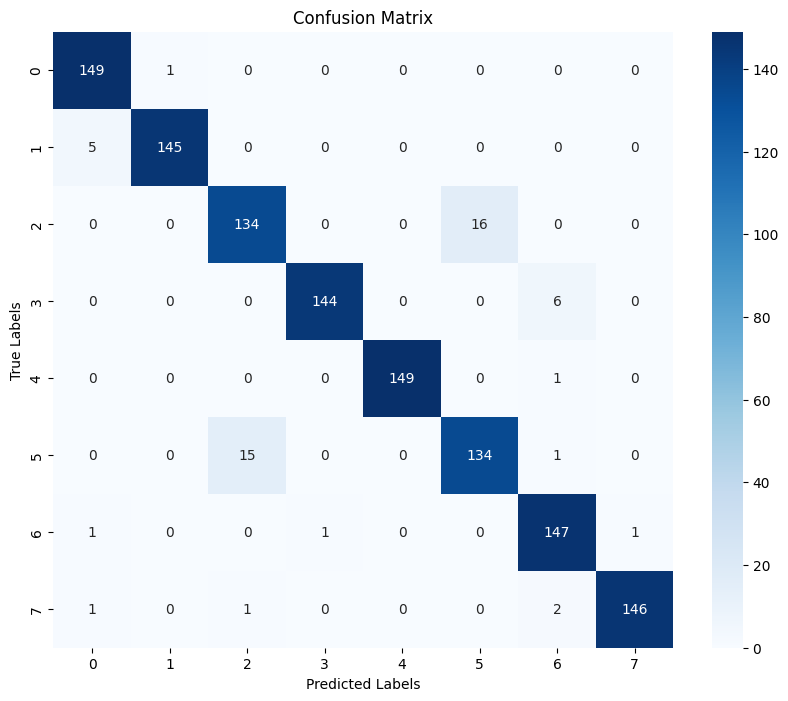

Accuracy: 0.9566666666666667
F1 Score: 0.9567498770842586


In [43]:
ab_classifier = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=0.5)

# Train and evaluate the model
ab_accuracy, ab_f1, ab_cm = train_and_evaluate_model(ab_classifier, X_train, y_train, X_test, y_test)
print(f'Accuracy: {ab_accuracy}')
print(f'F1 Score: {ab_f1}')

### KNN

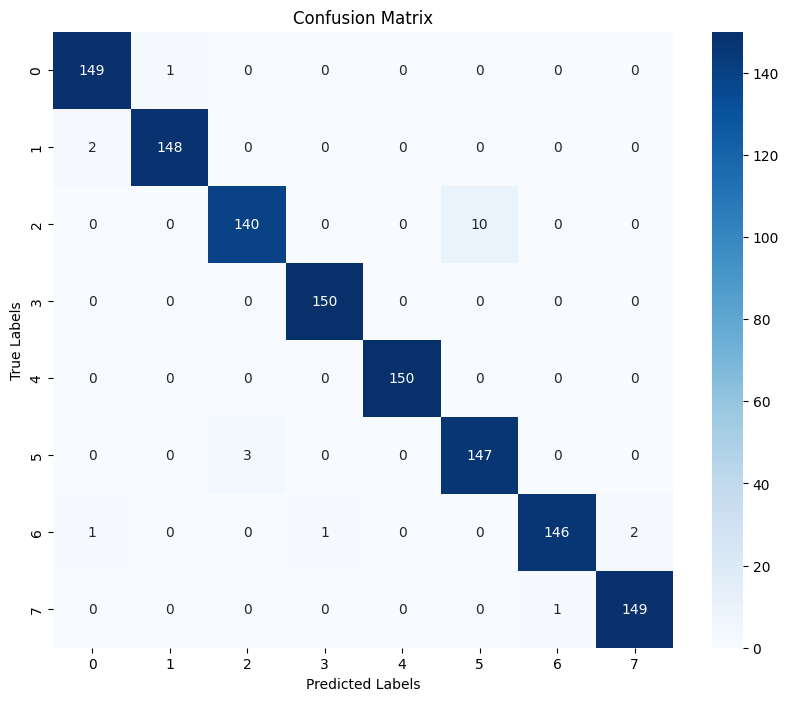

Accuracy: 0.9825
F1 Score: 0.9824854488919923


In [44]:
knn_classifier = KNeighborsClassifier()

# Train and evaluate the model
knn_accuracy, knn_f1, knn_cm = train_and_evaluate_model(knn_classifier, X_train, y_train, X_test, y_test)
print(f'Accuracy: {knn_accuracy}')
print(f'F1 Score: {knn_f1}')

# Results

| Model           | Accuracy   | F1 Score   |
| --------------- | ---------- | ---------- |
| SVM             | 0.985833   | 0.985837   |
| LightGBM        | 0.977500   | 0.977508   |
| KNN             | 0.982500   | 0.982485   |
| Random Forest   | 0.975833   | 0.975845   |
| AdaBoost        | 0.956666   | 0.956749   |

                                     SVM obtained Highest accuracy and F1 score

# Kvasir GI image Feature extraction, Classification and Clustering

This repository contains notebooks for feature extraction process on the Kvasir Gastrointestinal (GI) tract image data. Feature extraction was done in two ways. Using the extracted features I have performed classification task and clustering analysis.


## Workflow

**1. Dataset details:** The Kvasir dataset consists of images, annotated and verified by medical doctors (experienced endoscopists), including several classes showing anatomical landmarks, phatological findings or endoscopic procedures in the GI tract. The anatomical landmarks include Z-line, pylorus, and cecum, while the pathological finding includes esophagitis, polyps, and ulcerative colitis. In addition, there are another two class images related to removal of lesions, "dyed and lifted polyp" and the "dyed resection margins". The dataset consist of the images with different resolution from 720x576 up to 1920x1072 pixels and organized in a way where they are sorted in separate folders named accordingly to the content. Some of the included classes of images have a green picture in picture illustrating the position and configuration of the endoscope inside the bowel, by use of an electromagnetic imaging system (ScopeGuide, Olympus Europe) that may support the interpretation of the image.

**2. Loading the dataset:** I have unzipped the data from my google drive as I have stored the zip file (kvasir-v2.zip) in my google drive. In the data folder, each subfolder represents each class.

**3. Feature Extraction:** I have performed feature extraction in two following ways. After creating the mobileone_s4 model from timm library, I removed the final classification layer. After extracting the feature, I saved it as pickle file containing feature and label of each image.

* **MobileOne architecture with my best trained weights:** Here, I used the base mobileOne model with pretrained imagenet weights for extracting features.

* **MobileOne architecture with imagenet weights:** During the training with mobileOne_s4, I saved the best checkpoint based on val accuracy. I load the weights from the checkpoint for this feature extraction task.

**4. Classification and Clustering:** First, I loaded feature files. This part of the task was performed in following three ways. For classifcation, I have used SVM, KNN, Random Forest, Adaboost, and LightGBM. I also used K-means clustering and demonstrated the elbow plot.

* **Using the feature file generated from mobileone_s4 and my best trained weights:** 
* **Using the feature file generated from mobileone_s4 and imagenet weights:**
* **Concatenating feature files generated from MobileOne_s4, Efficientvit_m3, and Fastvit_t8:** 

**5. Result:**

**Using the best weights achieved after training with mobileOne_s4:**

| Model           | Accuracy   | F1 Score   |
| --------------- | ---------- | ---------- |
| SVM             | 0.978333   | 0.978342   |
| LightGBM        | 0.975833   | 0.975844   |
| KNN             | 0.975833   | 0.975854   |
| Random Forest   | 0.976666   | 0.976679   |
| AdaBoost        | 0.957500   | 0.957531   |

**Using the imagenet weights:**

| Model           | Accuracy   | F1 Score   |
| --------------- | ---------- | ---------- |
| SVM             | 0.889166   | 0.888754   |
| LightGBM        | 0.876666   | 0.876485   |
| KNN             | 0.741666   | 0.736347   |
| Random Forest   | 0.840833   | 0.840499   |
| AdaBoost        | 0.590833   | 0.578524   |

**Using the concatenated feature files generated from MobileOne_s4,FastVit_t8, and EfficientVit_m3:**

| Model           | Accuracy   | F1 Score   |
| --------------- | ---------- | ---------- |
| SVM             | 0.985833   | 0.985837   |
| LightGBM        | 0.977500   | 0.977508   |
| KNN             | 0.982500   | 0.982485   |
| Random Forest   | 0.975833   | 0.975845   |
| AdaBoost        | 0.956666   | 0.956749   |

## Conclusion:

This project demonstrates the entire workflow of extracting feature and performing classification and clustering using ML models and using those features. I have observed that I got much higher accuracy with the features those are generated using my best trained weights than imagenet weights on mobileone_s4. After comparing all three results, I found more improved accuracy with concatenated features. In all cases, SVM achieved higher accuracy.
